## Import Dependencies, Set Directory, Load in DF from pickle file 

In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from datetime import datetime

import pickle

In [5]:
#Set Directory
%cd "C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle"

C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle


In [6]:
#Load in Kaggle Documents with Column of Tokenized Words from Processing and KMeans Notebook

kdfeng = pickle.load(open("kdfeng.pickle.dat", "rb")) 
print("Loaded model from: kdfeng.pickle.dat")

Loaded model from: kdfeng.pickle.dat


In [7]:
kdfeng.head()

,ID,Title,Abstract,Document,Filepath,Detected Language,Tokenized
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 2...,"VP3, and VP0 (which is further processed to V...",biorxiv_medrxiv,en,"[process, viru, assembl, region, encod, protei..."
1,00340eea543336d54adda18236424de6a5e91c9d,Analysis Title: Regaining perspective on SARS-...,"During the past three months, a new coronavir...","In December 2019, a novel coronavirus, SARS-C...",biorxiv_medrxiv,en,"[decemb, novel, coronaviru, identifi, wuhan, c..."
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,NaN,The 2019-nCoV epidemic has spread across Chin...,biorxiv_medrxiv,en,"[epidem, spread, across, china, countri, febru..."
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant...,"Infectious bronchitis (IB), which is caused b...",biorxiv_medrxiv,en,"[infecti, bronchiti, ib, caus, infecti, bronch..."
4,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recentl...,Nipah is an infectious negative-sense single-...,biorxiv_medrxiv,en,"[nipah, infecti, rna, viru, belong, genu, heni..."


## TFIDF Vectorizer 

In [62]:
#Create stopword list

stop_words = stopwords.words('english')
# Additions to the stop word list
stop_words.extend(["copyright", 'preprint', 'biorxiv', 'et', 'medrxiv', 'doi', 'holder', 'license', 'al', 'fig', 'also', '10', 'may' ])

In [63]:
#Create tfidf vectorizer
vectorizer=TfidfVectorizer(stop_words=stop_words)

In [64]:
#Converts the text for each document into TF-IDF scores 

start=datetime.now()

X=vectorizer.fit_transform(kdfeng['Document'])

end=datetime.now()

print("Run time: ", end-start)

Run time:  0:03:42.771095


In [65]:
X.shape

(32632, 742099)

In [73]:
feats=vectorizer.get_feature_names()

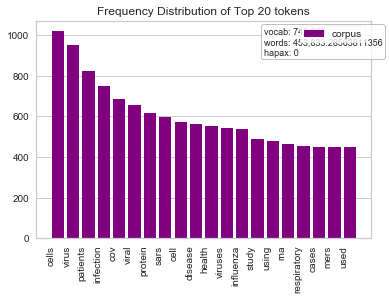

In [74]:
#Sum of the TFIDF scores for each word, top 20 words that end up in each document
#Axis is misleading, not a frequency distribution

from yellowbrick.text import FreqDistVisualizer
%matplotlib inline
import matplotlib.pyplot as plt

visualizer = FreqDistVisualizer(features=feats, orient='v', color='purple', n=20)
visualizer.fit(X)
visualizer.show()

In [82]:
#Create a query
query= "Transmission"

#Create a TF-IDF vector representation of the query using transform method 
query_vec=vectorizer.transform([query])

In [83]:
#Get cosign similarities for the query and the documents 

results = cosine_similarity(X,query_vec).reshape((-1,))

In [84]:
#Get the top 10 cosign similarities and print the names of the documents
#Some documents don't have names 

for i in results.argsort()[-10:][::-1]:
    print(kdfeng.iloc[i,1])
    print("-----------")

Transmission routes of respiratory viruses among humans
-----------
Sustained fecal-oral human-to-human transmission following a zoonotic event
-----------
From superspreaders to disease hotspots: linking transmission across hosts and space
-----------
Targeting Transmission Pathways for Emerging Zoonotic Disease Surveillance and Control
-----------
Interpreting whole genome sequencing for investigating tuberculosis transmission: a systematic review
-----------
Mapping a viral phylogeny onto outbreak trees to improve host transmission inference
-----------
Detecting Differential Transmissibilities That Affect the Size of Self-Limited Outbreaks
-----------
Supersize me: how whole-genome sequencing and big data are transforming epidemiology
-----------
When are pathogen genome sequences informative of transmission events?
-----------
Epidemiology and Infection Reconstruction and prediction of viral disease epidemics
-----------


In [72]:
#Count of missing values per column
kdfeng.isna().sum()

#3349 documents don't have titles

ID                      0
Title                3349
Abstract             8177
Document                0
Filepath                0
Detected Language       0
Tokenized               0
dtype: int64